# 集団の比較

サンプルデータはすでに使ったことのあるファイルSCMEM20211018.csvです．
このデータはスポーツナビ
（https://sports.yahoo.co.jp/japan/）
にあった，2021年10月18日現在のサッカー日本代表選手の身長，体重，年齢データをCSVファイルとして用意したものです．







In [ ]:
# CSVファイルの読み込み
# 変数名Japanに保存
Japan <- read.csv("SCMEM20211018.csv", stringsAsFactors=TRUE)
# はじめの6行を表示，
head(Japan)
# データの構成を表示
# PropertyはMEN, OLYM, WOMの3種で構成されている
# それぞれ男子，五輪，女子メンバーに対応する
summary(Japan)
# 変数名MenにPropertyの値がMENであるデータを代入
Men <- Japan[Japan$Property=="MEN",]
# 変数名WomenにPropertyの値がWOMであるデータを代入
Women <- Japan[Japan$Property=="WOM",]
# 変数名OlymにPropertyの値がOLYMであるデータを代入
Olym <- Japan[Japan$Property=="OLYM",]

,Property,Height,Weight,Age
,<fct>,<int>,<int>,<int>
1,MEN,185,82,38
2,MEN,187,84,32
3,MEN,190,84,20
4,MEN,182,73,22
5,MEN,186,77,26
6,MEN,176,69,27


 Property      Height          Weight           Age       
 MEN :25   Min.   :154.0   Min.   :44.00   Min.   :19.00  
 OLYM:22   1st Qu.:167.0   1st Qu.:60.50   1st Qu.:23.00  
 WOM :23   Median :175.5   Median :69.00   Median :24.00  
           Mean   :174.5   Mean   :68.13   Mean   :25.33  
           3rd Qu.:182.0   3rd Qu.:76.00   3rd Qu.:27.00  
           Max.   :190.0   Max.   :91.00   Max.   :38.00  

## 選んだ値同士を比較する

次の例では，Rの関数sampleにより，男子代表Menの身長Height，五輪代表Olymの身長Height，女子代表Womenの身長Heightの間で比較をしています．



In [ ]:
# 男子代表と五輪代表の身長の比較
x <- sample(Men$Height,1)
y <- sample(Olym$Height,1)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
x-y
# 一度に5人取り出し比較する
# sample関数はとくに指定しなければ重複を許す取り出し
x <- sample(Men$Height,5)
y <- sample(Olym$Height,5)
x-y
# 正の要素の個数
sum(x-y>0)



[1] -5

[1] 19  3 -6 11  3

[1] 4

この実行例でわかるのは，もとの集団からの取り出しをランダムに行っているために，同じ5人を取り出した場合でも，その順番により正の要素の個数も変わることです．

そのため，この実行例で得られた観察を利用するには，
- 実験を多数繰り返して集計結果から情報を得る
- 元の要素が有限なので総当たりで比べた情報を得る
が考えられます．

総当たりの場合の正負の割合にもとづいて比較する方法が順位和検定と呼ばれる方法です．
「順位」とは（身長の）値の差ではなく，正負の符号のみに着目しているからです．「和」とはもとの値自体ではなく，順位のみに注目し，しかもその和だけを調べれば確率を計算できるという数学的性質にもとづきます．
よく使われる順位和による分析方法にWilcoxonの順位和検定があります．
「検定」とはこうした比較に際して確率（p-value）を計算する手法をtestと呼ぶことにもとづきます．

In [27]:
# Wilcoxonの順位和（rank sum）検定
wilcox.test(Men$Height,Olym$Height)

Warning message in wilcox.test.default(Men$Height, Olym$Height):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Men$Height and Olym$Height
W = 251, p-value = 0.6157
alternative hypothesis: true location shift is not equal to 0


レポート内にtieとあるのは，比較されるべき2つの集団内に同じ値があることを表し，ここでは「タイがあるために正確な確率が計算できない（cannot compute exact p-value with ties）」というメッセージを表示しています．
連続性補正（continuity correction）とはよりよい計算値を求めるための技術を表します．
ほとんどの検定手法では偶然に検定統計量（ここでは順位和）の値が得られる確率（p値）を計算します．
偶然ではない状況に設定される仮説のことを対立仮説（alternative hypothesis）といいます．

以上，メッセージにある文の説明をしましたが，本講座では具体的な計算方法までは解説しません．
後でp値と対立仮説については説明します．

以上で扱った順位情報（大小関係のみの情報）による比較は，数学的知識抜きに比較できる素朴な方法なのですが，コンピュータ利用以前には，実際に計算しようと思うと煩雑な方法だったこともあり，広く使われてはいなかったようです．

## 平均値による比較

以下では平均値による比較方法について検討します．
まずは2つの集団から1名ずつ選びながら，その身長の差を，ヒストグラムをとることにより特徴を観察してみます．

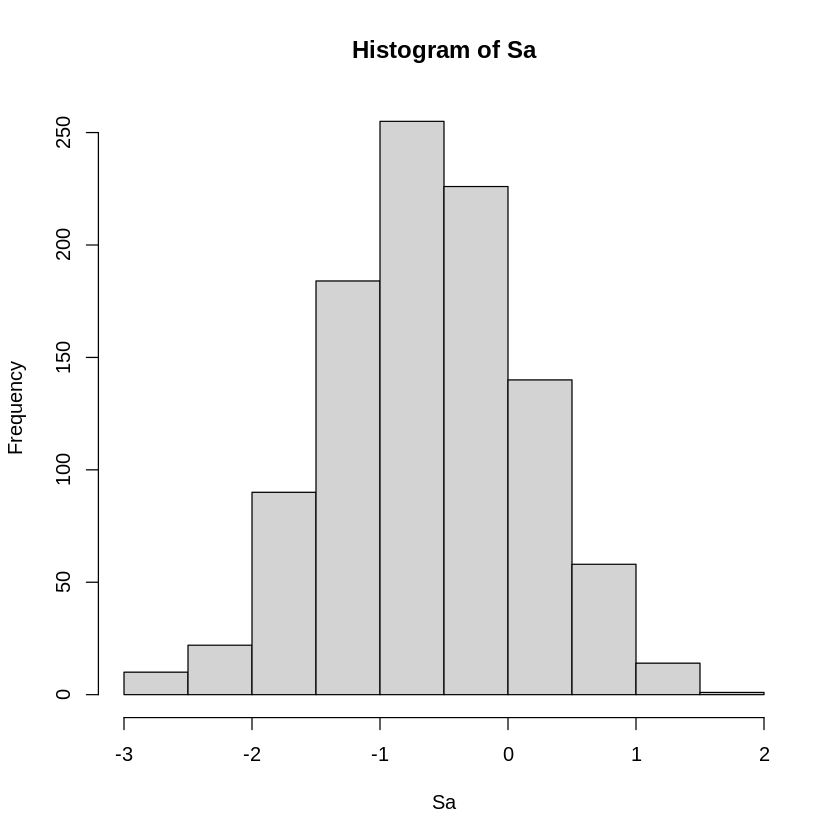

In [35]:
# 集計するデータをm個集めます
m <- 1000
# サンプルをn個取り出します
# もととなるデータは20個余りしかないが，それより多ければ重複して取り出す
n <- 1
Sa = numeric(m)
for (i in 1:m) {
# 男子代表と五輪代表の身長の比較
  x <- sample(Men$Height,n)
  y <- sample(Olym$Height,n)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
  Sa[i] <- mean(x)-mean(y)
}
hist(Sa)


問：上のRプログラムでmは変えずにnを変えて実行した場合に得られるグラフの特徴を観察してみよう．

問：上のRプログラムでnは変えずにmを変えて実行した場合に得られるグラフの特徴を観察してみよう．

問：上のRプログラムで取り出すデータの一方を女子代表に変えて実行した場合に得られるグラフの特徴を観察してみよう．

ここに用意した変更前のプログラムでは男子代表と五輪代表の比較でn=1000，m=1とした．
このとき上端から2.5％（つまり25個分）の値は15から20の間，下端は-15から20の間にある．
これは比較している2つの集団の差の約95％が，およそ15から-15までの間にあることを示している．

ここでRの用意するt検定関数を実行してみよう．


In [33]:
# stemは幹葉図を与える関数
t.test(Men$Height,Olym$Height)


	Welch Two Sample t-test

data:  Men$Height and Olym$Height
t = -0.28711, df = 41.334, p-value = 0.7755
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.673346  3.509710
sample estimates:
mean of x mean of y 
 179.6000  180.1818 


ここで95％信頼区間（95percent confidence interval）は上のヒストグラムで得た観察と同じような意味の数値です．
すでに問で試したと思いますが，例題の数値（Nn=1）を10や20など大きな数値にして実行してみてください．
この場合に上下端から2.5％にあるおよその値を読み取ってみてください．
どうですか．
Rのt検定関数の出した95％信頼区間の値に近くなったと思います．



In [ ]:
# 各カテゴリーの年齢ごとの度数を集計する
table(Men$Age)
table(Olym$Age)
table(Women$Age)


20 22 23 24 25 26 27 28 29 30 31 32 33 35 38 
 1  2  1  3  2  5  1  2  1  1  2  1  1  1  1 


19 20 21 22 23 24 28 31 33 
 1  2  1  3  5  7  1  1  1 


21 22 23 24 25 26 27 29 31 
 3  3  1  4  4  3  2  1  2 

二項係数を計算する

In [47]:
n <- 10
x <- 0:n
choose(n,x)
p <- 0.5
q <- 1-p
y <- n:0
Nikou <- choose(n,x)*p^x*q^y
sum(Nikou)

[1]   1  10  45 120 210 252 210 120  45  10   1

[1] 1

治験のシミュレーション

新薬に効果がなければ15人中9人が回復する状況を設定する．
このために1から15の乱数を生成し，9以下なら回復とみなす


In [46]:
n<-100
x <- floor(runif(n,1,16))
sum(x > 9)/n

[1] 0.36

高校数学Iで扱った平均値の公式
$$\bar{x}=\frac{1}{n}\sum_{k=1}^n x_k$$
および分散の公式
$$\frac{1}{n}\sum_{k=1}^n (x_k-\bar{x})^2$$
をあげます．
以下の計算例では，Rの数式計算の特徴をうまく使って計算しているために，数学の計算式と思うとよくわからないところもあります．
数学の計算式とRの計算式との違いは後日扱います．


In [ ]:
# 関数lengthで公式のnにあたる量を求めている
# これをベクトルのサイズという
sum(x)/length(x)
# 式 x-mean(x)を偏差という
# 分散をことばでいうと，偏差の2乗平均である
sum((x-mean(x))^2)/length(x)
# 上の値は関数varのものと一致しない
# var関数と一致するのは次の式の値である
# 割り算の分母が少し小さい
n <- length(x)
sum((x-mean(x))^2)/(n-1)
var(x)
# 次の計算をすれば上の公式と一致する
var(x)*(n-1)/n

[1] 27.24

[1] 17.8624

[1] 18.60667

[1] 18.60667

[1] 17.8624

ここで改めて，同じxに対して平均値，標準偏差，ヒストグラムを計算させます．
さらに平均値±標準偏差および平均値±2倍の標準偏差を計算しておきました．

問：上の各値はヒストグラムのどこに読み取れるでしょうか．